IMPORT LIBRARIES



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET :


In [5]:
df = pd.read_csv('statalytical showdown(in).csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Windows,Chrome,Delhi,Direct Traffic,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,macOS,Firefox,Delhi,Organic Search Traffic,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Android,Chrome,Pune,Paid Search Traffic,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,Linux,Firefox,Mumbai,Referral Traffic,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,Linux,Safari,Delhi,Referral Traffic,Returning_Visitor,True,False


EXAMINING THE DATA:


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


CHECKING FOR NULL VALUES OR MISSING VALUES:


In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

CHECKING AND HANDLING DUPLICATES :


In [9]:
duplicate_rows = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")
data = df.drop_duplicates()

Total duplicate rows: 125


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType              12

In [14]:
mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only=True)
mode_values = data.mode(numeric_only=True).iloc[0] 

std_dev = data.std(numeric_only=True)
variance = data.var(numeric_only=True)
min_values = data.min(numeric_only=True)
max_values = data.max(numeric_only=True)

summary_stats = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values,
    "Std Dev": std_dev,
    "Variance": variance,
    "Min": min_values,
    "Max": max_values
})

summary_stats

,Mean,Median,Mode,Std Dev,Variance,Min,Max
Administrative,2.338878,1.000000,0,3.330436,1.109181e+01,0,27
Administrative_Duration,81.646331,9.000000,0.0,177.491845,3.150336e+04,0.0,3398.75
Informational,0.508726,0.000000,0,1.275617,1.627198e+00,0,24
Informational_Duration,34.825454,0.000000,0.0,141.424807,2.000098e+04,0.0,2549.375
ProductRelated,32.045637,18.000000,1,44.593649,1.988594e+03,0,705
ProductRelated_Duration,1206.982457,608.942857,0.0,1919.601400,3.684870e+06,0.0,63973.52223
BounceRates,0.020370,0.002899,0.0,0.045255,2.048055e-03,0.0,0.2
ExitRates,0.041466,0.025000,0.2,0.046163,2.130995e-03,0.0,0.2
PageValues,5.949574,0.000000,0.0,18.653671,3.479594e+02,0.0,361.763742
SpecialDay,0.061942,0.000000,0.0,0.199666,3.986660e-02,0.0,1.0


Univariate Analysis with Visualization

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\41486043.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data , x='Revenue', palette = 'rainbow')


<Axes: xlabel='Revenue', ylabel='count'>

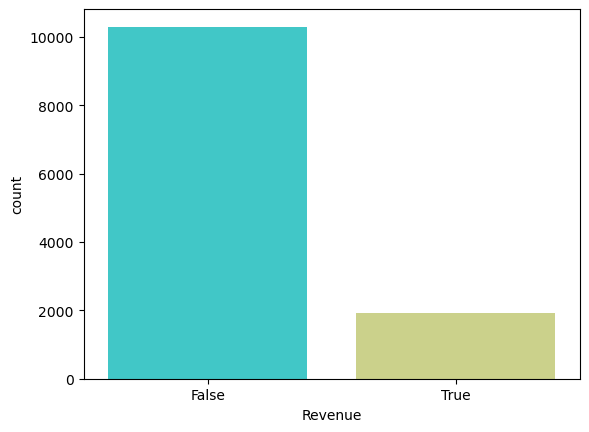

In [23]:
sns.countplot(data , x='Revenue', palette = 'rainbow')

In [24]:
data['Weekend'].value_counts()

Weekend
False    9346
True     2859
Name: count, dtype: int64

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\4255278990.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data,x='Weekend' , palette = 'inferno')


<Axes: xlabel='Weekend', ylabel='count'>

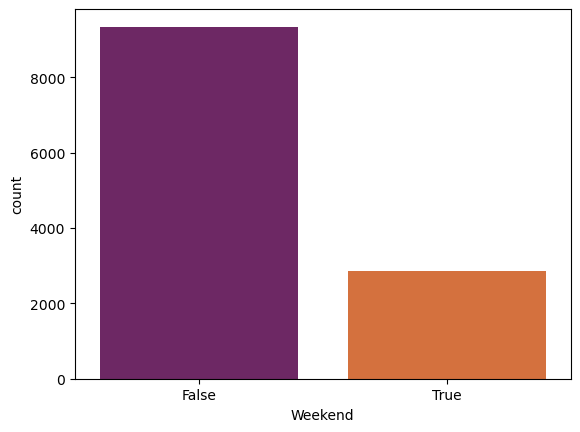

In [25]:
sns.countplot(data,x='Weekend' , palette = 'inferno')

In [27]:
data['OperatingSystems'].value_counts()

OperatingSystems
macOS      6541
Windows    2549
Linux      2530
Android     478
Debian       75
Ubuntu       19
Fedora        7
iOS           6
Name: count, dtype: int64

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\3657403807.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data , x = 'OperatingSystems' , palette = 'rainbow')


<Axes: xlabel='OperatingSystems', ylabel='count'>

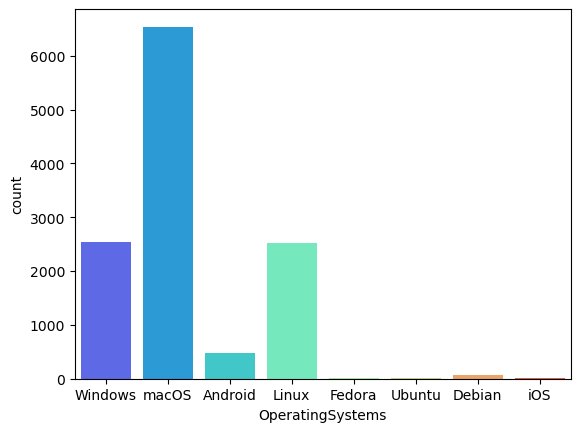

In [34]:
sns.countplot(data , x = 'OperatingSystems' , palette = 'rainbow')

In [28]:
data['Browser'].value_counts()


Browser
Firefox              7883
Chrome               2427
Edge                  731
Opera                 465
Brave                 174
UC Browser            163
Internet Explorer     135
Safari                105
Pale Moon              56
Vivaldi                49
SeaMonkey              10
Maxthon                 6
Tor Browser             1
Name: count, dtype: int64

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\3691652311.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data , x = 'Browser' , palette = 'rainbow' )


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Chrome'),
  Text(1, 0, 'Firefox'),
  Text(2, 0, 'Safari'),
  Text(3, 0, 'Edge'),
  Text(4, 0, 'Opera'),
  Text(5, 0, 'Brave'),
  Text(6, 0, 'Vivaldi'),
  Text(7, 0, 'UC Browser'),
  Text(8, 0, 'Internet Explorer'),
  Text(9, 0, 'Tor Browser'),
  Text(10, 0, 'SeaMonkey'),
  Text(11, 0, 'Pale Moon'),
  Text(12, 0, 'Maxthon')])

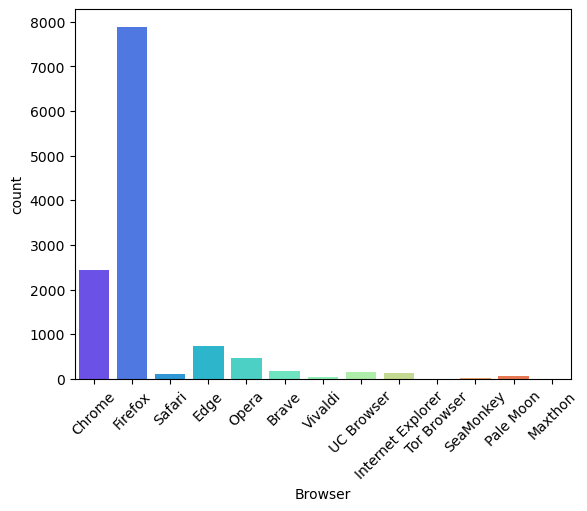

In [36]:
sns.countplot(data , x = 'Browser' , palette = 'rainbow' )
plt.xticks(rotation = 45)

In [29]:
data['Month'].value_counts()

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

In [ ]:
data['MonthNumber'] = 

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\1028211008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data , x='Month' , palette = 'rainbow')


<Axes: xlabel='Month', ylabel='count'>

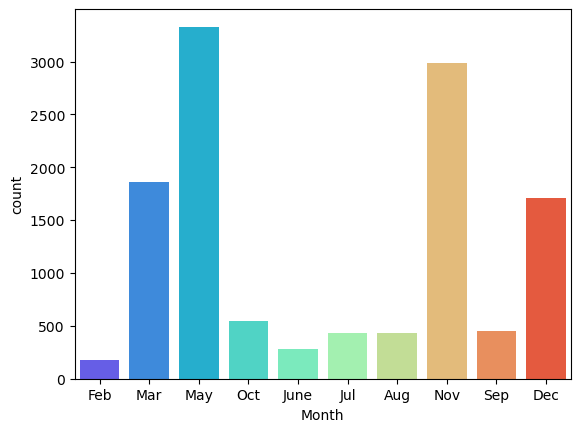

In [37]:
sns.countplot(data , x='Month' , palette = 'rainbow')

In [30]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

<Axes: xlabel='VisitorType', ylabel='count'>

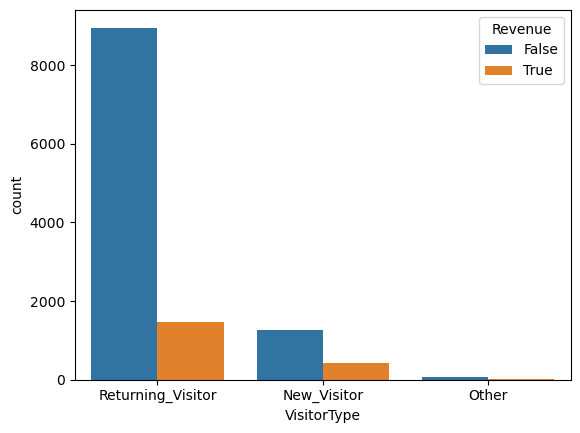

In [38]:
sns.countplot(data, x='VisitorType' , hue ='Revenue')

In [31]:
data['TrafficType'].value_counts()

TrafficType
Organic Search Traffic              3911
Direct Traffic                      2388
Paid Search Traffic                 2013
Referral Traffic                    1066
Podcast Traffic                      728
Video Marketing Traffic              450
Email Traffic                        443
Affiliate Marketing Traffic          343
Social Media Traffic                 260
Content Marketing Traffic            247
Community Traffic                    193
Influencer Marketing Traffic          41
Display Advertising Traffic           40
Push Notification Traffic             37
Forum Traffic                         17
SMS Marketing Traffic                 13
Guest Blogging Traffic                10
Retargeting Traffic                    3
Mobile App Traffic                     1
Influencer Collaboration Traffic       1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Organic Search Traffic'),
  Text(2, 0, 'Paid Search Traffic'),
  Text(3, 0, 'Referral Traffic'),
  Text(4, 0, 'Social Media Traffic'),
  Text(5, 0, 'Email Traffic'),
  Text(6, 0, 'Display Advertising Traffic'),
  Text(7, 0, 'Affiliate Marketing Traffic'),
  Text(8, 0, 'Influencer Marketing Traffic'),
  Text(9, 0, 'Video Marketing Traffic'),
  Text(10, 0, 'Content Marketing Traffic'),
  Text(11, 0, 'Mobile App Traffic'),
  Text(12, 0, 'Podcast Traffic'),
  Text(13, 0, 'SMS Marketing Traffic'),
  Text(14, 0, 'Push Notification Traffic'),
  Text(15, 0, 'Guest Blogging Traffic'),
  Text(16, 0, 'Forum Traffic'),
  Text(17, 0, 'Retargeting Traffic'),
  Text(18, 0, 'Influencer Collaboration Traffic'),
  Text(19, 0, 'Community Traffic')])

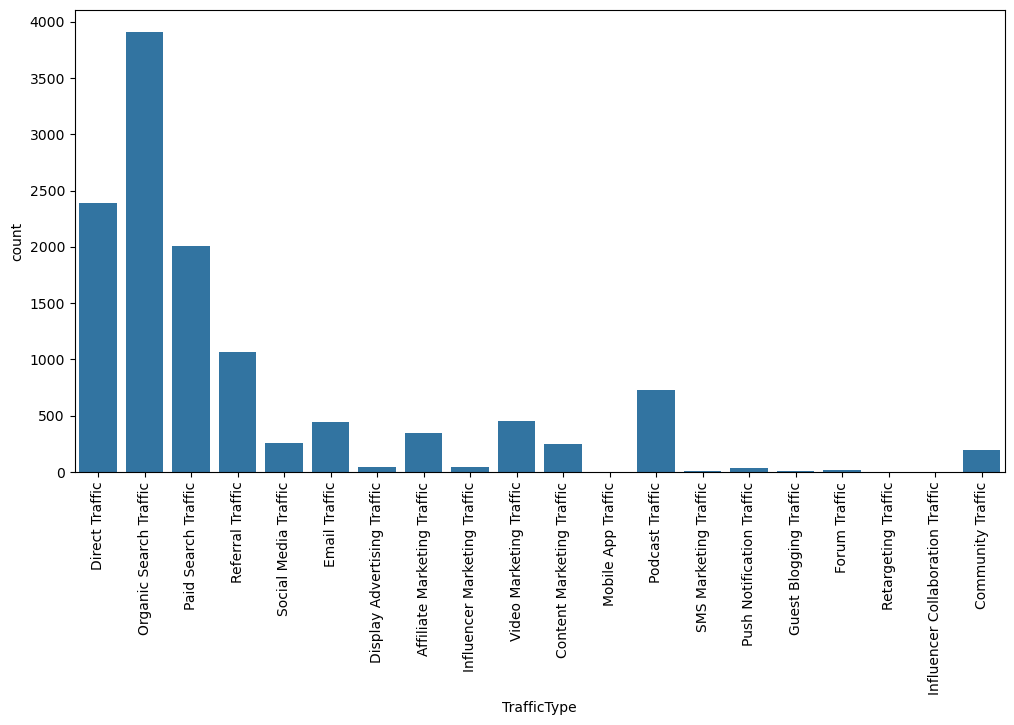

In [42]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data , x='TrafficType')
plt.xticks(rotation = 90)

In [43]:
data['Region'].value_counts()

Region
Delhi        4714
Kolkata      2379
Bangalore    1171
Mumbai       1128
Hyderabad     801
Ahmedabad     758
Pune          505
Surat         431
Chennai       318
Name: count, dtype: int64

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\1719586057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data , x='Region' ,  palette = 'inferno')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Pune'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Bangalore'),
  Text(5, 0, 'Chennai'),
  Text(6, 0, 'Hyderabad'),
  Text(7, 0, 'Ahmedabad'),
  Text(8, 0, 'Surat')])

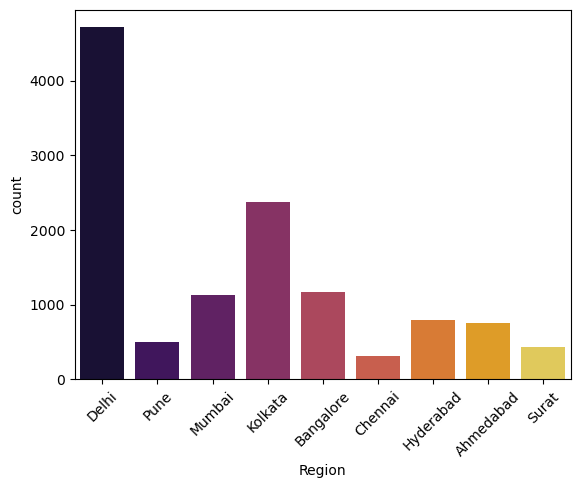

In [46]:
sns.countplot(data , x='Region' ,  palette = 'inferno')
plt.xticks(rotation = 45)

In [47]:
data['SpecialDay'].value_counts()

SpecialDay
0.0    10956
0.6      350
0.8      324
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

DATA CORRELATION WITH COLUMNS

<Figure size 1200x600 with 0 Axes>

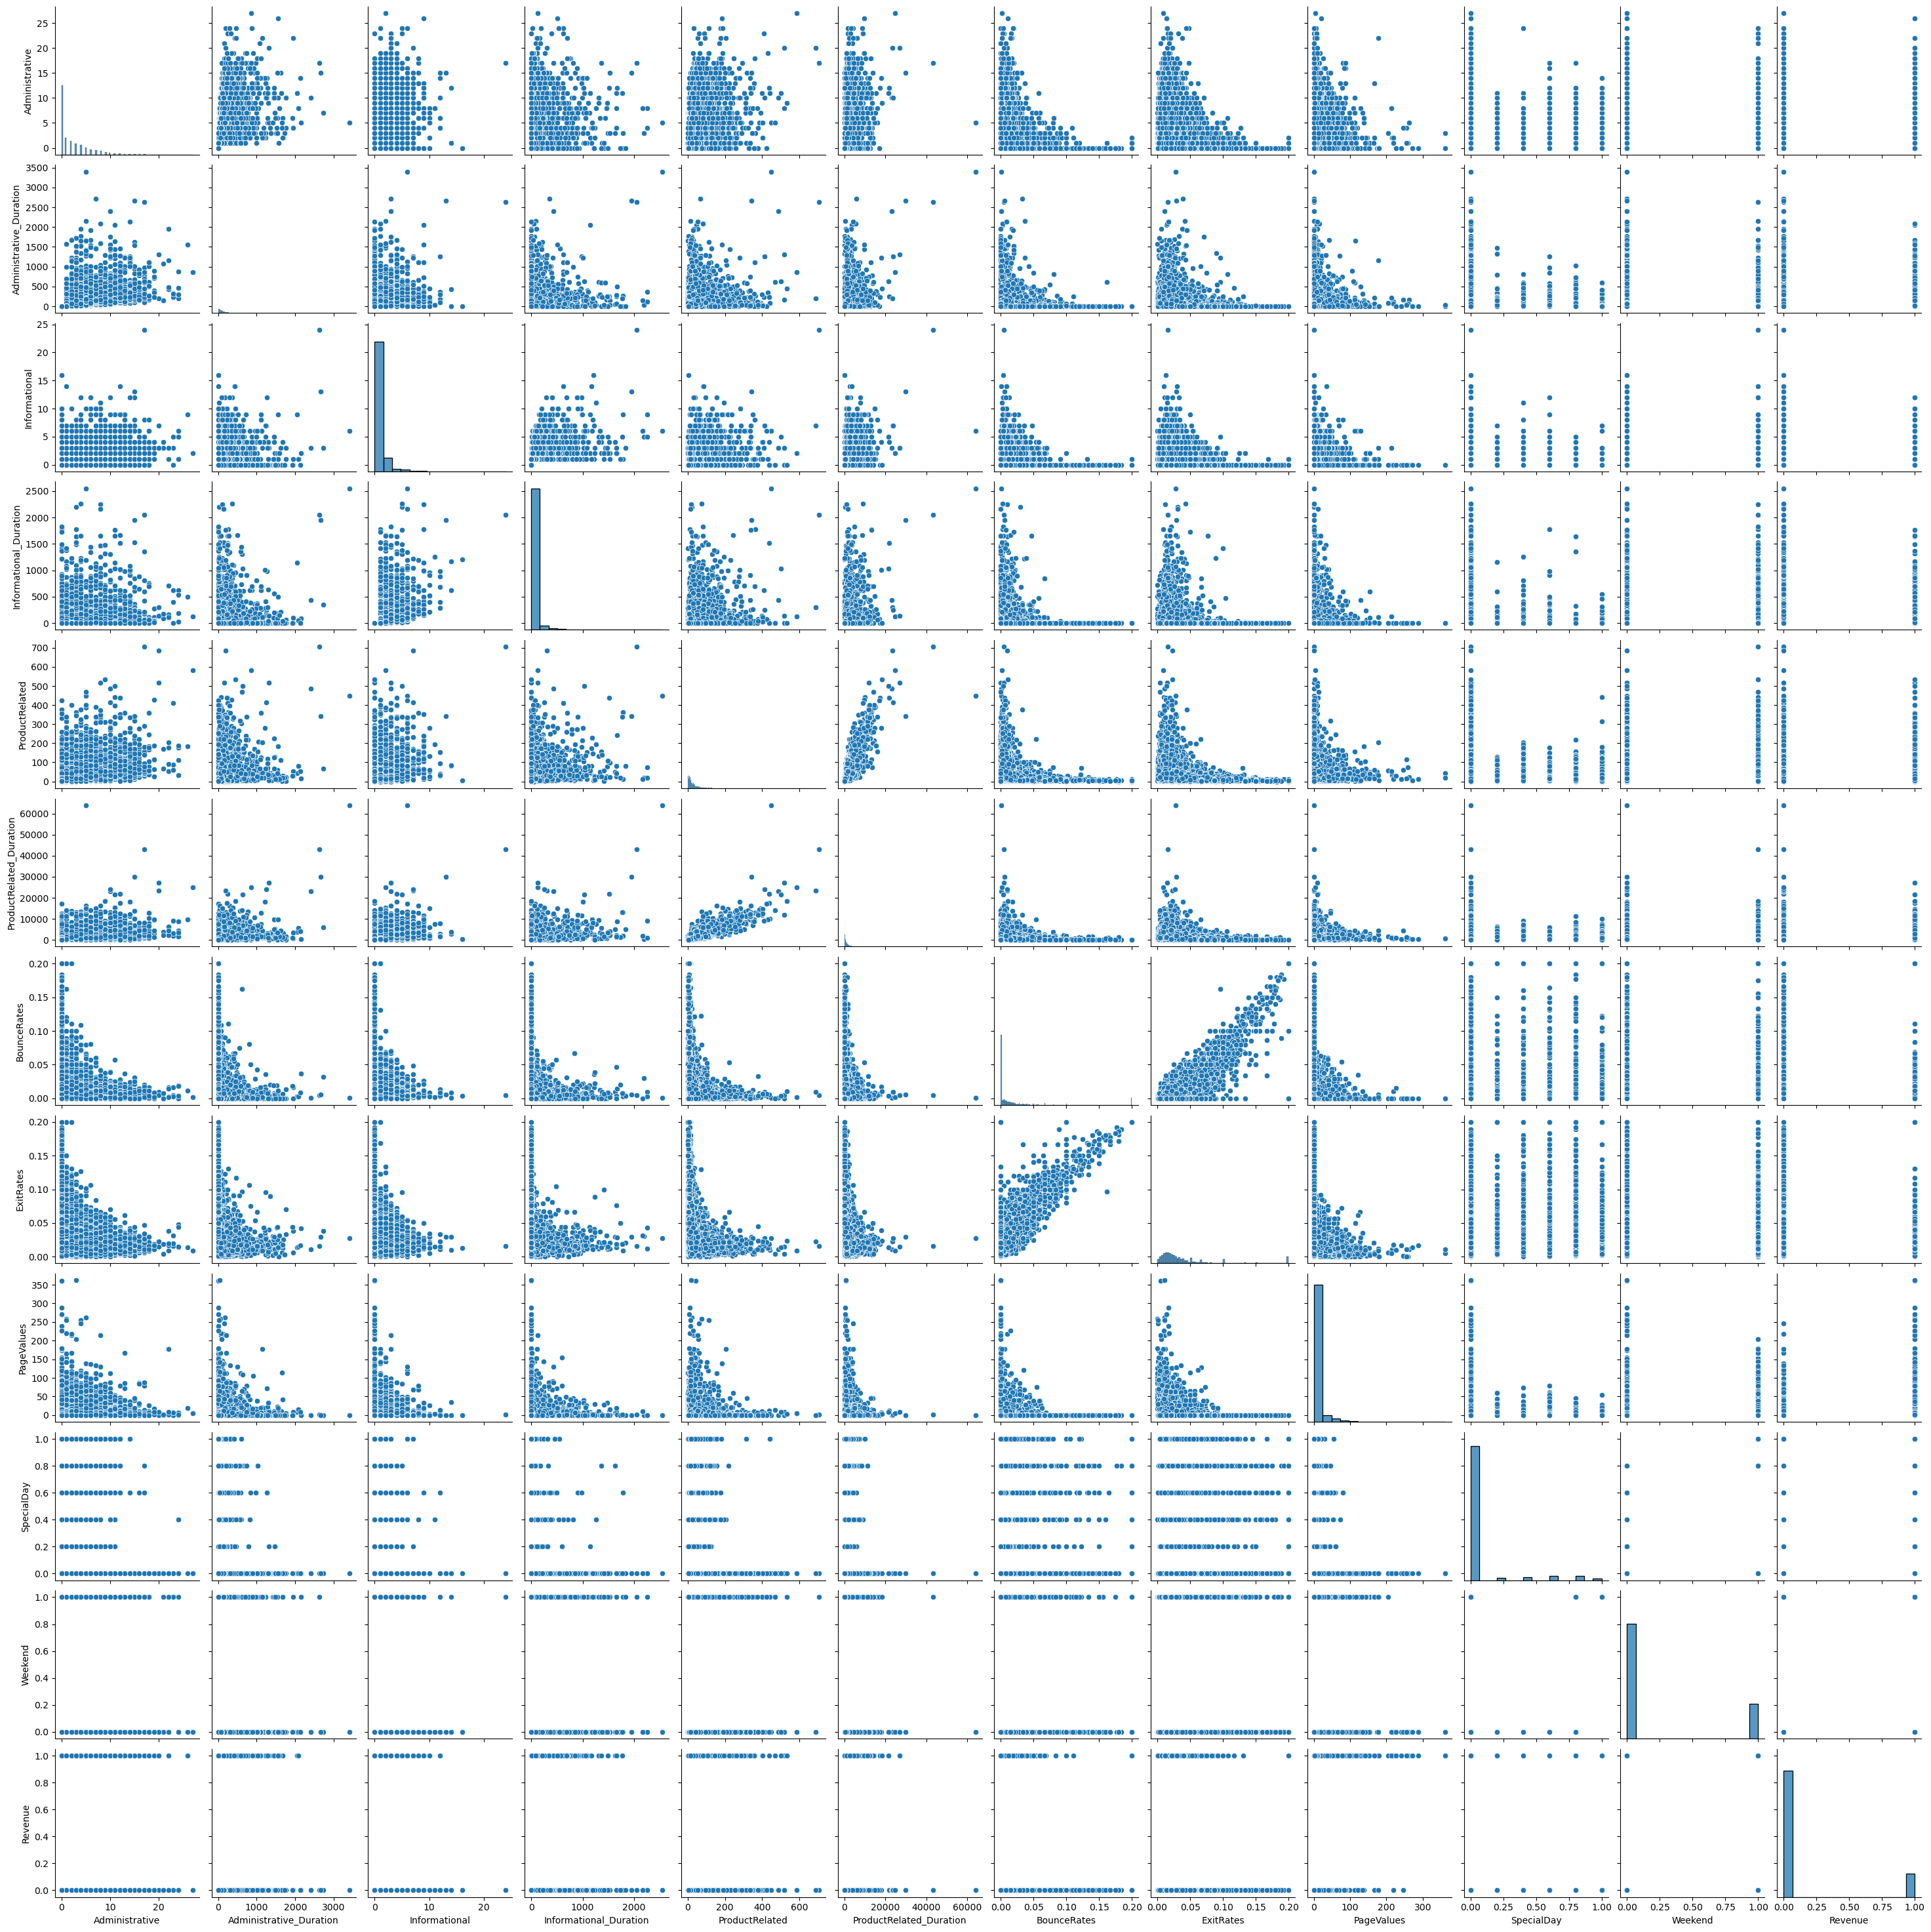

In [53]:
plt.figure(figsize=(12, 6)) 
sns.pairplot(data)
plt.show()

In [59]:

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns.tolist())

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns.tolist())

Categorical columns: ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


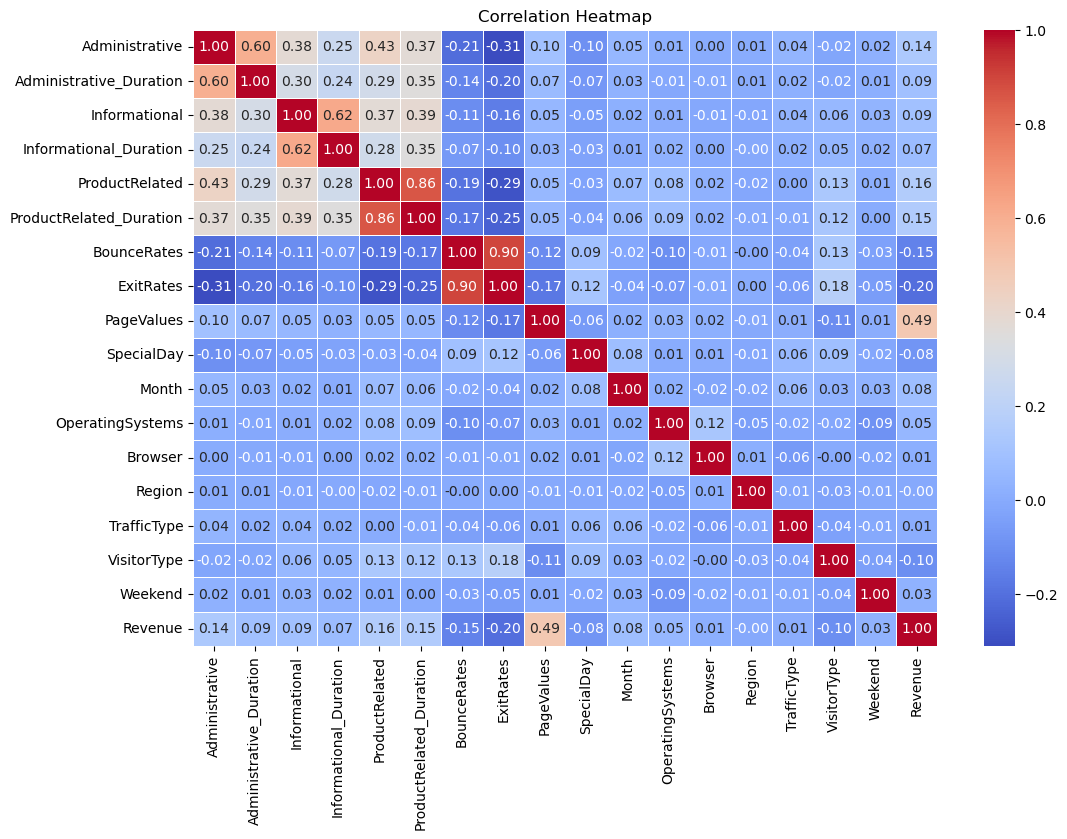

In [60]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = data.copy()
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Bi-Variate Analysis with Visualization

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\1105457135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Revenue"], y=data["Administrative_Duration"], palette="coolwarm")


<Axes: xlabel='Revenue', ylabel='Administrative_Duration'>

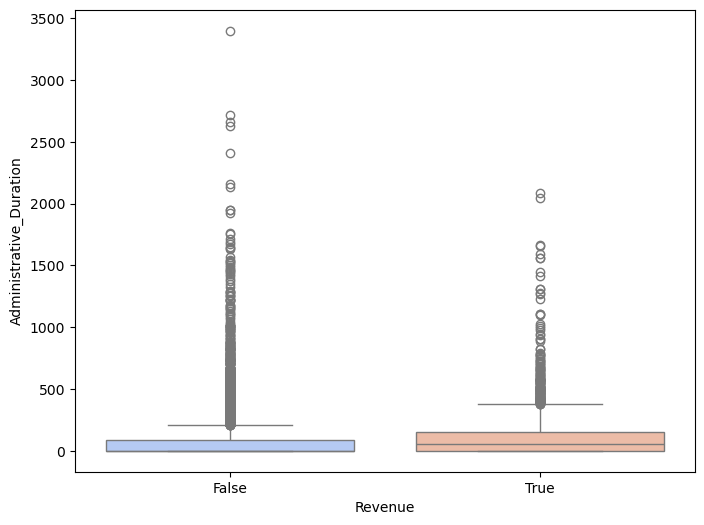

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Revenue"], y=data["Administrative_Duration"], palette="coolwarm")

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\2337088495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Revenue"], y=data["Informational_Duration"], palette="coolwarm")


<Axes: xlabel='Revenue', ylabel='Informational_Duration'>

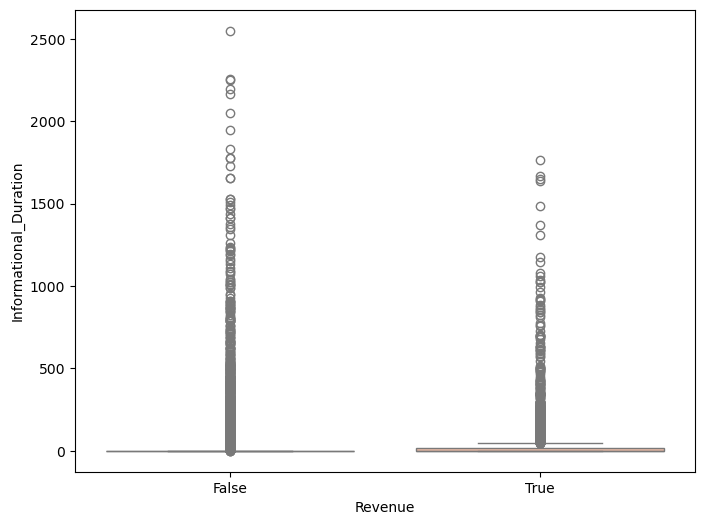

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Revenue"], y=data["Informational_Duration"], palette="coolwarm")

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\3306705590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Revenue"], y=data["ProductRelated_Duration"], palette="coolwarm")


<Axes: xlabel='Revenue', ylabel='ProductRelated_Duration'>

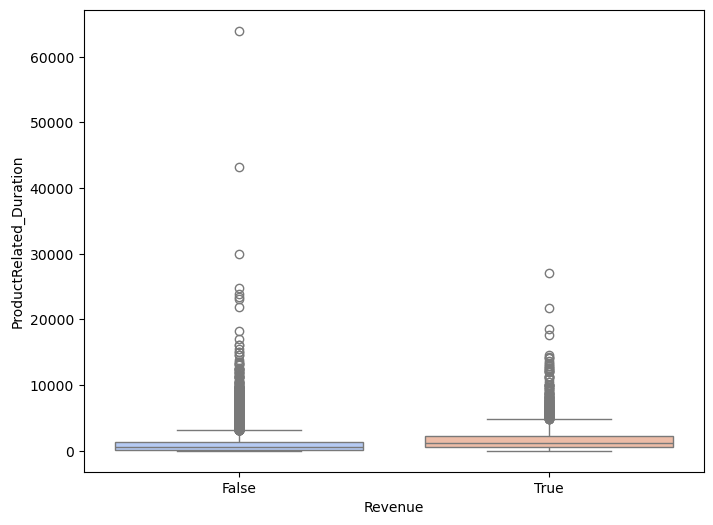

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Revenue"], y=data["ProductRelated_Duration"], palette="coolwarm")

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\3222615365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Revenue"], y=data["ExitRates"], palette="coolwarm")


<Axes: xlabel='Revenue', ylabel='ExitRates'>

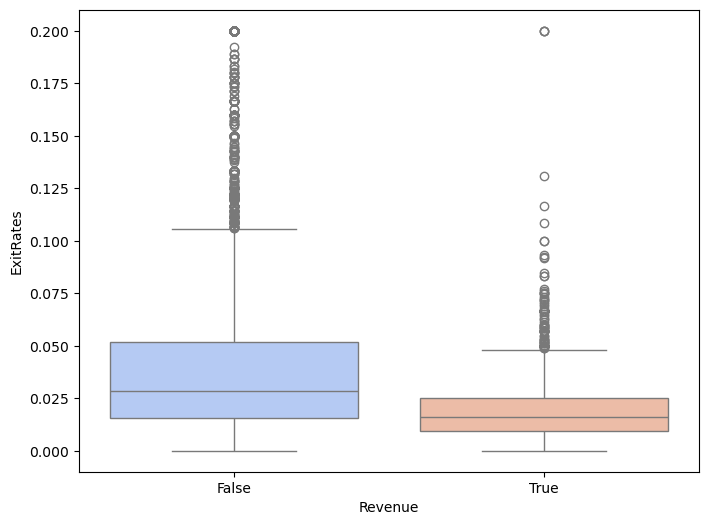

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Revenue"], y=data["ExitRates"], palette="coolwarm")

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\1796360466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Revenue"], y=data["PageValues"], palette="coolwarm")


<Axes: xlabel='Revenue', ylabel='PageValues'>

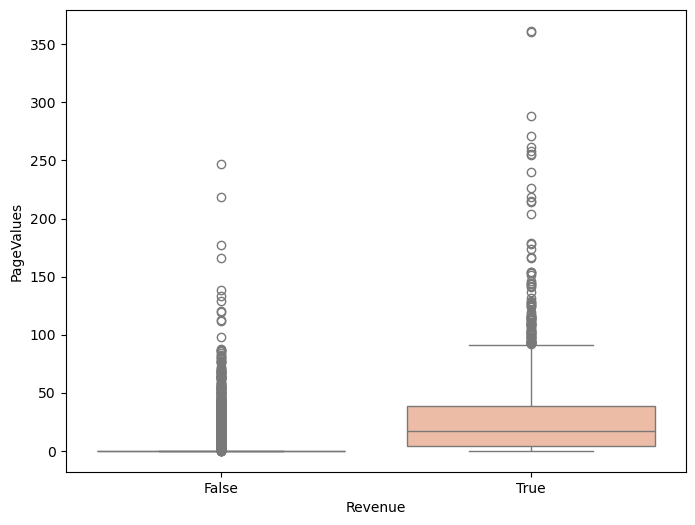

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Revenue"], y=data["PageValues"], palette="coolwarm")

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\3424240059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Revenue"], y=data["BounceRates"], palette="coolwarm")


<Axes: xlabel='Revenue', ylabel='BounceRates'>

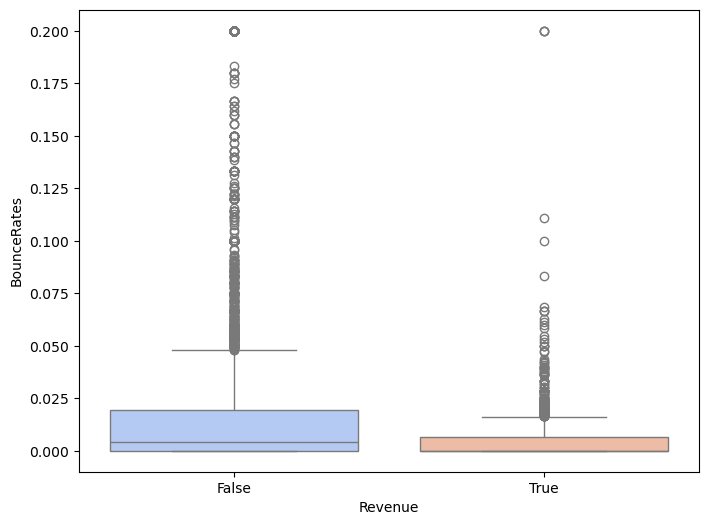

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Revenue"], y=data["BounceRates"], palette="coolwarm")

C:\Users\mohit\AppData\Local\Temp\ipykernel_4288\1433110424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["Revenue"], x=data["Weekend"], palette="coolwarm" ,data = data )


<Axes: xlabel='Weekend', ylabel='Revenue'>

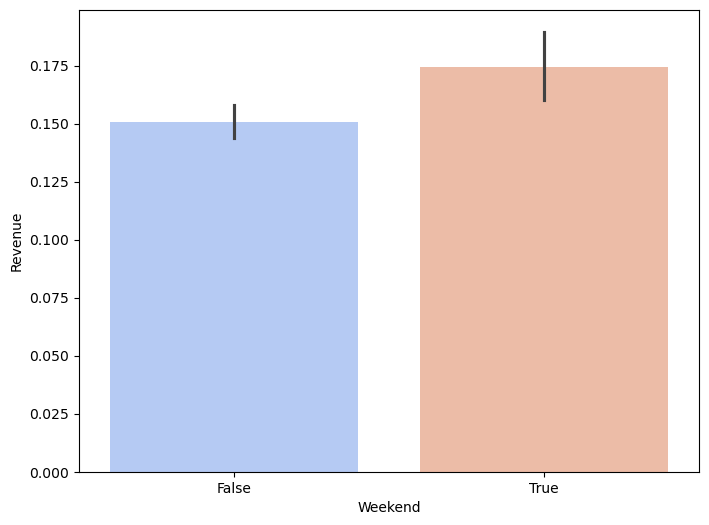

In [82]:
plt.figure(figsize=(8, 6))
sns.barplot(y=data["Revenue"], x=data["Weekend"], palette="coolwarm" ,data = data )

<Axes: xlabel='Month', ylabel='PageValues'>

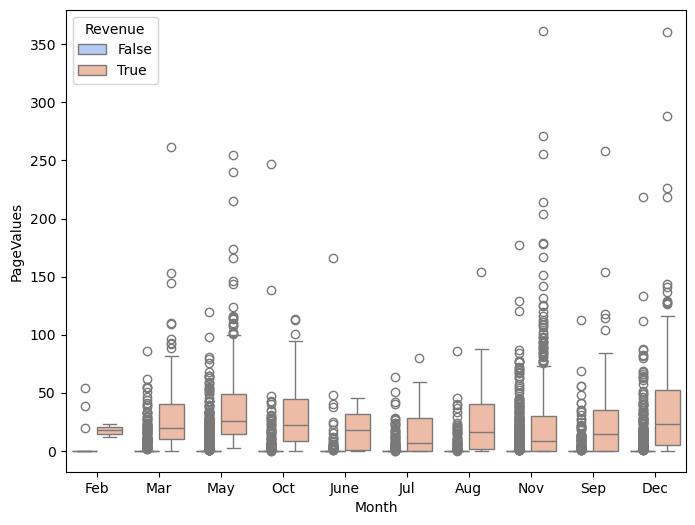

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Month"], y=data["PageValues"],hue= data['Revenue'] ,palette="coolwarm")

<Axes: xlabel='Month', ylabel='ExitRates'>

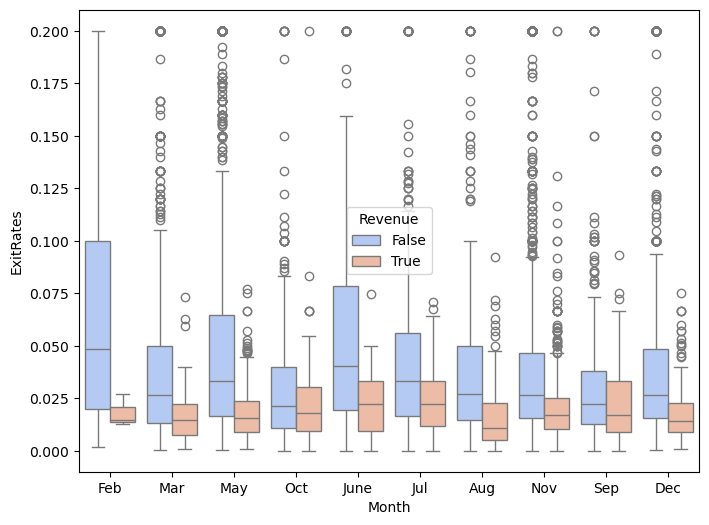

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Month'], y=data['ExitRates'],hue=data['Revenue'], palette="coolwarm")

CALCULATING OUTLIERS:

In [89]:
from sklearn.preprocessing import LabelEncoder

def data_insights(df):
    print("🔹 Dataset Overview:")
    print(f"Shape: {df.shape}")
    print(f"Total Missing Values: {data.isnull().sum().sum()}")
    print(f"Total Duplicates: {data.duplicated().sum()}")

    # Convert categorical columns to numeric (Label Encoding)
    data_encoded = data.copy()
    categorical_columns = data.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col])

    print("\n🔹 Top Correlated Features:")
    corr_matrix = data_encoded.corr().abs()
    high_corr = corr_matrix.unstack().sort_values(ascending=False)
    high_corr = high_corr[high_corr < 1].drop_duplicates()
    print(high_corr.head(10))

    print("\n🔹 Potential Outliers Detected:")
    numerical_columns = data_encoded.select_dtypes(include=['number']).columns
    Q1 = data_encoded[numerical_columns].quantile(0.25)
    Q3 = data_encoded[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    outlier_counts = ((data_encoded[numerical_columns] < (Q1 - 1.5 * IQR)) | (data_encoded[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
    print(outlier_counts[outlier_counts > 0])

# Call the function
data_insights(data)

🔹 Dataset Overview:
Shape: (12205, 18)
Total Missing Values: 0
Total Duplicates: 0

🔹 Top Correlated Features:
BounceRates              ExitRates                  0.902144
ProductRelated_Duration  ProductRelated             0.860330
Informational_Duration   Informational              0.618648
Administrative           Administrative_Duration    0.600457
PageValues               Revenue                    0.491894
ProductRelated           Administrative             0.428305
ProductRelated_Duration  Informational              0.386052
Administrative           Informational              0.375256
ProductRelated           Informational              0.372572
Administrative           ProductRelated_Duration    0.371146
dtype: float64

🔹 Potential Outliers Detected:
Administrative              404
Administrative_Duration    1149
Informational              2631
Informational_Duration     2405
ProductRelated             1007
ProductRelated_Duration     951
BounceRates                1428
ExitRate

ML MODEL DEPLOYMENT:

In [90]:
# Convert all categorical based on heat map realtion into numerical  :
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month']
for col in categorical_features:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8657745336577454


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
# Check our model on train and test data respectively :

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# This tells us that our model is performing well on both the train and test data.

Train Accuracy: 0.8854420113544201
Test Accuracy: 0.8657745336577454


MODEL EVALUATION :

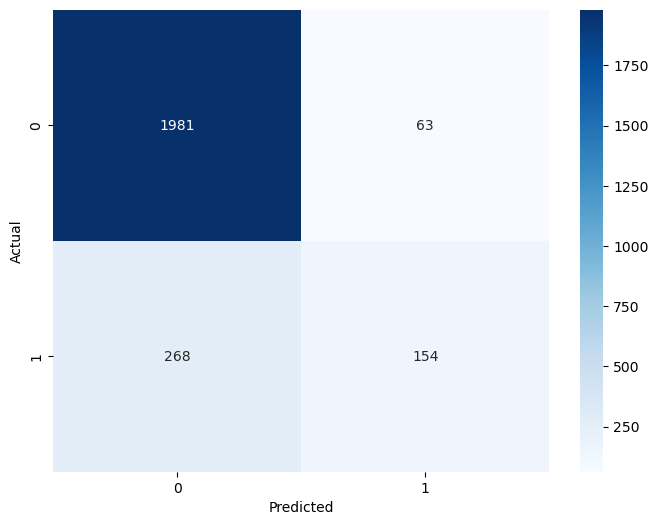

In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()  

